파이썬 머신러닝 완벽가이드 pg. 118~147

# 05 데이터 전처리

ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과가 크게 달라질 수 있다. 따라서 데이터 전처리는 매우 중요하다.

결손값은 개수가 얼마 되지 않는다면 간단히 대체해야하지만, 대부분이라면 해당 피처를 드롭하는 것이 좋다. 더 정밀한 대체 값을 선정해야 하는 경우도 존재한다.

머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않기 때문에 모든 문자열 값은 인코딩되어 숫자형으로 변환되어야 한다.

## 데이터 인코딩

### 레이블 인코딩

레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다.

예를들어 TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서로 되어있다면 TV :1, 냉장고 :2, 전자레인지 :3, 컴퓨터:4, 선풍기:5, 믹서:6 같이 숫자형 값으로 변환하는 것이다. 단, 코드값 역시 문자열이므로 숫자형 값으로 변환하는 것이 필요하다.

LabelEncoder 클래스를 통해 구현될 수 있다.

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 3 3 2 2]


많은 경우 문자열 값이 어떤 숫자열 값으로 인코딩 됐는 지 파악할 수 없다. classes_ 속성값을 이용한다.

In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '컴퓨터']


In [6]:
print('디코딩 원본값:', encoder.inverse_transform([4,2,0,1,1,3,3]))

디코딩 원본값: ['컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


이를 통해 인코딩된 값을 다시 디코딩할 수 있다.

레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환해준다. 하지만 숫자의 크고 작음에 대한 특성이 작용하면서 몇몇 알고리즘에 예측 성능이 떨어지는 경우가 존재한다. 이러한 특성 때문에 회귀 같은 알고리즘에는 적용해선 안되며, 트리 계열의 알고리즘에는 상관 없다.

### 원핫인코딩

원핫인코딩은 피처값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다.

즉, 해당 고유값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력하는 것이다.

원핫 인코딩은 OneHotEncoder 클래스로 쉽게 변환이 가능하지만, 두 가지 주의점이 있다.

- 변환 전에 모든 문자열 값이 숫자형 값으로 변환되어야 한다.

- 입력값으로 2차원 데이터가 필요하다.

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환해줌
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
# 2차원 데이터로 변환
labels= labels.reshape(-1,1)

# 원핫 인코딩 적용
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels= oh_encoder.transform(labels)
print('원핫 인코딩 데이터')
print(oh_labels.toarray())
print('원핫 인코딩 데이터 차원')
print(oh_labels.shape)

원핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 데이터 차원
(8, 6)


get_dummies()를 이용하면 문자열 카테고리 값을 숫자형으로 변환할 필요 없어진다.

In [8]:
import pandas as pd

df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화

피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

- 표준화 : 데이터를 가우시안 정규분포를 가진 값으로 변환하는 것

- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 것.
원래 값에서 피처 x의 최솟값을 뺀 값을 최댓값과 최솟값의 차이로 나눈 값으로 변환할 수 있음.

사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됨. 이를 앞으로 벡터정규화로 지칭할 것

### 표준화

StandardScaler : 가우시안 정규 분포를 가지도록 데이터를 변환하는 것은 서포트 벡터 머신, 선형회귀, 로지스틱 회귀에서 매우 중요함.

In [9]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_data= iris.data
iris_df= pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 ndarray로 반환돼 이를 데이터프레임으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환되었음

### 정규화

MinMaxScaler는 데이터값을 0과 1 사이의 범위 값으로 변환한다. (음수가 있다면 -1 ~ 1)

데이터의 분포가 가우시안 분포가 아니면 적용.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(iris_df)
iris_scaled= scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns= iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

객체를 이용해 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용한다. 일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정, transform()은 데이터 변환 기능을 한다.

fit_transform()은 이를 한번에 적용한다.

이때, 학습데이터로 fit() 과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습데이터 세트를 이용한 결과를 이용해 transform() 변환을 적용해야한다. 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습데이터와 테스트 데이터의 스케일링 기준 정보가 달라지기 때문이다.

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

# 별도의 파라미터 지정하지 않으면 0 ~ 1로 변환
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array) # 원본 : 10 -> 1로 변환

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('Scale 된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale 된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [13]:
scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


테스트 데이터는 1/5로 스케일링되었지만, 학습데이터는 1/10으로 스케일링되며 서로 다른 원본 값이 동일한 값으로 변환되는 결과를 초래한다.

머신러닝은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야하며, 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1 값으로 변환되어야 한다.

In [14]:
scaler= MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

test_scaled =scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


fit_transform은 테스트 데이터에서는 절대로 사용해선 안된다.

따라서 전체 데이터 세트에 스케일링을 적용한 후 학습과 테스트 데이터 세트로 분리하는 것이 바람직하다.

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리

2. 1이 안된다면 테스트 데이터 변환시에느 fit()이나 fit_transform()을 적용하지 않고 학습데이터로 fit()된 객체 활용

# 06 사이킷런으로 수행하는 타이타닉 생존자 예측

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
titanic_df=pd.read_csv("/content/drive/MyDrive/데이터/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 eda

In [18]:
print('\n ## 학습 데이터 정보 ## \n')
print(titanic_df.info())


 ## 학습 데이터 정보 ## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [19]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isna().sum())

데이터 세트 Null 값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [20]:
# 문자열 피처의 값 분류
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [21]:
# Cabin값 정리
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [22]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

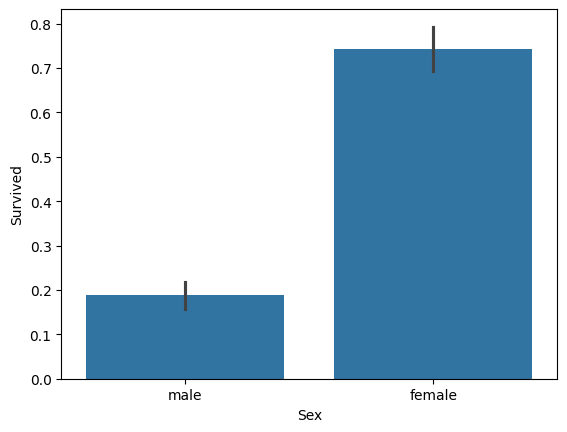

In [23]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

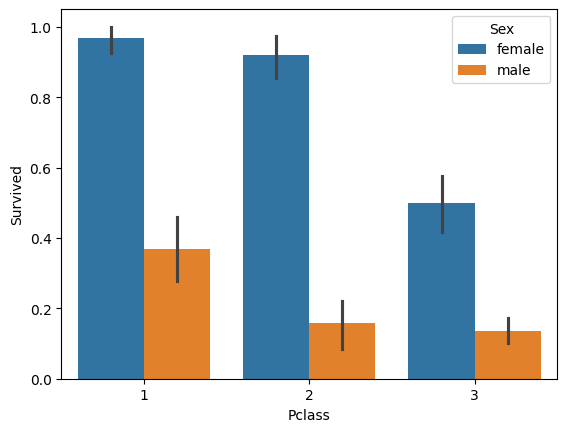

In [24]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data= titanic_df)

## 데이터 전처리

In [25]:
def get_category(age):
  cat=''
  if age<=1 : cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<= 12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else : cat= 'Elderly'

  return cat

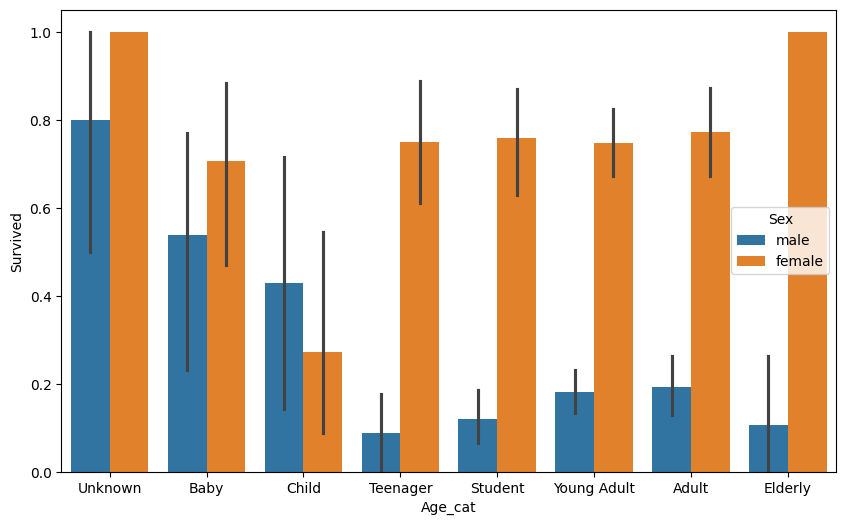

In [26]:
from tokenize import group
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [27]:
# 남은 문자열 카테고리를 숫자형으로 변환

from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [28]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin']= df['Cabin'].str[:1]
  features =['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le= le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df= fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [29]:
titanic_df=pd.read_csv("/content/drive/MyDrive/데이터/titanic.csv")

In [31]:
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

In [32]:
X_titanic_df =transform_features(X_titanic_df)

## 모델링

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 클래스생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DT
dt_clf.fit(X_train, y_train)
dt_pred= dt_clf.predict(X_test)
print('DT 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RF
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RF 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LR
lr_clf.fit(X_train, y_train)
lr_pred= lr_clf.predict(X_test)
print('로지스틱 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DT 정확도 : 0.7877
RF 정확도 : 0.8547
로지스틱 정확도 : 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# 교차검증
# KFold

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores=[]

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    clf.fit(X_train, y_train)
    predictions= clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)

    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

  mean_score= np.mean(scores)
  print('평균 정확도: {0:.4f}',format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: {0:.4f} 0.782298662984119


In [38]:
# cross_val_score

from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


## 최적 하이퍼파라미터 찾기, 예측

In [39]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
       'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSeachCV 최적 하이퍼파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서 DT 정확도: {0:.4f}'.format(accuracy))

GridSeachCV 최적 하이퍼파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서 DT 정확도: 0.8715


테스트용 데이터 세트가 작기 때문에 예측 성능이 많이 증가

# 07 정리

머신러닝은 데이터를 가공, 전처리 후 데이터 세트 분리 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킨다. 그리고 그걸 기반으로 테스트 데이터에 대한 예측을 수행하고, 그 결괏값을 실제와 비교해 모델에 대한 평가를 수행한다.